##Principal Component Analysis (PCA)

One of the major scheme to speed up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice.

This exercise deals with the basic visualization of the IRIS dataset after applying PCA. You can use PCA to reduce that 4 dimensional data (sepal length, sepal width, petal length, and petal width) into 2 or 3 dimensions so that you can understand the data better.




In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris['target_names'])
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
display(df.head())

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width','petal length','petal width']

# Separating out the features and targets
x = iris.data
y = iris.target

# Standardizing the features
x = StandardScaler().fit_transform(x) # Standardizes features
print(x[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [3]:
# 2 dimensional PCA Projection
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2'])
display(principalDf.head())
finalDf = pd.concat([principalDf, df[['target']]],axis=1)
display(finalDf.head())


,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


,principal component 1,principal component 2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0


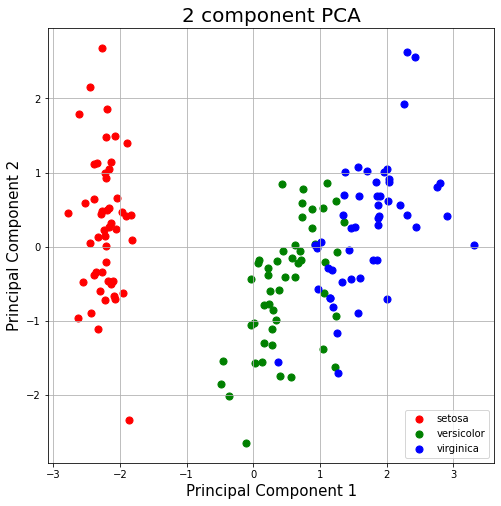

In [4]:
# Visualize 2D projection
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = {'setosa': 0, 'versicolor' : 1, 'virginica' : 2}
colors = ['r', 'g', 'b']
for target, color in zip(targets.values(), colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets.keys())
ax.grid()

eigen_value : [2.93808505 0.9201649  0.14774182]
explained variance ratio: [0.72962445 0.22850762 0.03668922]


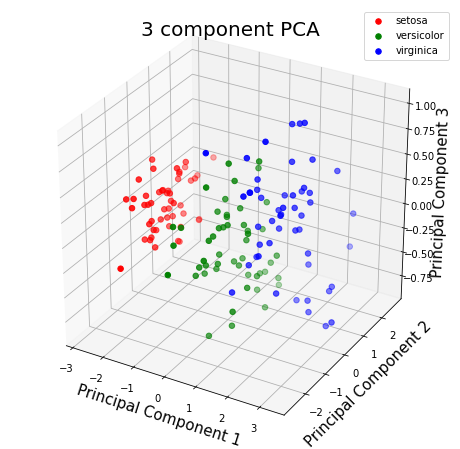

In [5]:
# 3 dimensional PCA projection 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 3)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df[['target']]],axis=1)

fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(111,projection='3d')
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 component PCA', fontsize = 20)

targets = {'setosa': 0, 'versicolor' : 1, 'virginica' : 2}
colors = ['r', 'g', 'b']
for target, color in zip(targets.values(),colors):
    indicesToKeep = finalDf['target'] == target
    ax2.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               ,finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 30)
ax2.legend(targets.keys())
ax2.grid()

print('eigen_value :', pca2.explained_variance_)
print('explained variance ratio:', pca2.explained_variance_ratio_)


## References
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


